In [1]:
import pandas as pd
import gc

from helpers.readers import read_dataframe

<a id="Contents"></a> <br>
# Content
* [1 - Loading default dataframes](#default)
<br>
* [2 - Merged Dataframes](#merged)
<br>

- **Q1: How impactful is the team surrounding the director on the success of a movie?**
- **Q2: To what extent does the director’s choice of movie genre affect the success of the movie?**
- **Q3: What is the impact of the director’s character choices on the success of the movie?**
- **Q4 (opt.): Can we spot bright underrated directors who are in the early stages of their career?**

<img src="https://i.postimg.cc/d3X75w5g/cmu-with-nlp.png" width="600"/>
<img src="https://i.ibb.co/ZxFYrXx/image-2023-12-04-132642806.png" width="200"/>
<img src="https://i.postimg.cc/NjvFFNS8/imdb.png" width="400"/>
<img src="https://iili.io/JzZN5CJ.png" width="200"/>
<img src="https://i.postimg.cc/yNVNXDVk/mappings.png" width="500"/>
<img src="https://i.postimg.cc/KvTnQPp9/movielens.png" width="550"/>

<a class="anchor" id="default"></a>
## Loading default dataframes
[Back to Table of Contents](#Contents)

### CMU Metadata

In [10]:
cmu_movies = read_dataframe(name='cmu/movies', preprocess=True, usecols=[
    "Wikipedia movie ID", 
    "Freebase movie ID", 
    "Movie name", 
    "Movie release date", 
    "Movie box office revenue", 
    "Movie runtime", 
    "Movie languages", 
    "Movie countries", 
    "Movie genres",
])

cmu_movies.info()
cmu_movies.head(1)

Preprocess logs:
✅ Fixed Movie Languages inside Movie Countries
✅ Removed Deseret characters
✅ Movie release date splitted to three columns: Movie release Year, Movie release Month, Movie release Day
✅ Seperated freebase identifiers from Movie Languages, Movie Countries and Movie Genres
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81741 entries, 0 to 81740
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Wikipedia movie ID        81741 non-null  int32  
 1   Freebase movie ID         81741 non-null  string 
 2   Movie name                81741 non-null  string 
 3   Movie box office revenue  8401 non-null   float64
 4   Movie runtime             61291 non-null  float32
 5   Movie release Year        74839 non-null  Int16  
 6   Movie release Month       42667 non-null  Int8   
 7   Movie release Day         39373 non-null  Int8   
 8   Movie languages           81741 non-null  string

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie box office revenue,Movie runtime,Movie release Year,Movie release Month,Movie release Day,Movie languages,Movie countries,Movie genres
0,975900,/m/03vyhn,Ghosts of Mars,14010832.0,98.0,2001,8,24,English,United States of America,"Thriller,Science Fiction,Horror,Adventure,Supe..."


In [11]:
cmu_characters = read_dataframe(name='cmu/characters', preprocess=True, usecols=[
    "Wikipedia movie ID",
    "Freebase movie ID",
    "Movie release date",
    "Character name",
    "Actor DOB",
    "Actor gender",
    "Actor height",
    "Actor ethnicity",
    "Actor name",
    "Actor age at movie release",
    "Freebase character/actor map ID",
    "Freebase character ID",
    "Freebase actor ID",
])

cmu_characters.info()
cmu_characters.head(1)

Preprocess logs:
✅ Movie release date splitted to three columns: Movie release Year, Movie release Month, Movie release Day
✅ Actor DOB splitted to three columns: Actor DOB Year, Actor DOB Month, Actor DOB Day
✅ Dropped Freebase character/actor map ID and Freebase character ID
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450669 entries, 0 to 450668
Data columns (total 15 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Wikipedia movie ID               450669 non-null  int32  
 1   Freebase movie ID                450669 non-null  string 
 2   Character name                   192794 non-null  string 
 3   Actor gender                     405060 non-null  string 
 4   Actor height                     154824 non-null  float32
 5   Actor ethnicity                  106058 non-null  string 
 6   Actor name                       449441 non-null  string 
 7   Actor age at movie release       292556

,Wikipedia movie ID,Freebase movie ID,Character name,Actor gender,Actor height,Actor ethnicity,Actor name,Actor age at movie release,Freebase character/actor map ID,Movie release Year,Movie release Month,Movie release Day,Actor DOB Year,Actor DOB Month,Actor DOB Day
0,975900,/m/03vyhn,Akooshay,F,1.62,<NA>,Wanda De Jesus,42.0,/m/0bgchxw,2001,8,24,1958,8,26


### CMU Scraped Infobox

In [12]:
cmu_scraped_movies = read_dataframe(name='cmu/movies_scraped')
cmu_scraped_movies.info()
cmu_scraped_movies.head(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81741 entries, 0 to 81740
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Wikipedia movie ID  81741 non-null  int32 
 1   Directed by         72635 non-null  string
 2   Screenplay by       14758 non-null  string
 3   Story by            8196 non-null   string
 4   Based on            14587 non-null  string
 5   Produced by         58334 non-null  string
 6   Starring            66937 non-null  string
 7   Cinematography      56994 non-null  string
 8   Edited by           49426 non-null  string
 9   Music by            52683 non-null  string
 10  Production company  1227 non-null   string
 11  Distributed by      48703 non-null  string
 12  Release dates       9384 non-null   string
 13  Running time        63508 non-null  string
 14  Country             61236 non-null  string
 15  Language            61338 non-null  string
 16  Budget              16

,Wikipedia movie ID,Directed by,Screenplay by,Story by,Based on,Produced by,Starring,Cinematography,Edited by,Music by,Production company,Distributed by,Release dates,Running time,Country,Language,Budget,Box office
0,975900,John Carpenter,<NA>,<NA>,<NA>,Sandy King,Ice Cube Natasha Henstridge Jason Statham Pam ...,Gary B. Kibbe,Paul C. Warschilka,John Carpenter,<NA>,Sony Pictures Releasing,<NA>,98 minutes,United States,English,$28 million,$14 million


### IMDb (https://developer.imdb.com/non-commercial-datasets/) (4/7)

In [13]:
imdb_people = read_dataframe(name='imdb/names')
imdb_people.info()
imdb_people.head(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12904751 entries, 0 to 12904750
Data columns (total 6 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   nconst             string
 1   primaryName        string
 2   birthYear          Int16 
 3   deathYear          Int16 
 4   primaryProfession  string
 5   knownForTitles     string
dtypes: Int16(2), string(4)
memory usage: 467.7 MB


,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0053137,tt0050419,tt0072308,tt0031983"


In [14]:
imdb_info = read_dataframe(name='imdb/movies', preprocess=True)
imdb_info.info()
imdb_info.head(1)

Preprocess logs:
✅ Moved genres from runtimeMinutes to genres column
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10218119 entries, 0 to 10218118
Data columns (total 9 columns):
 #   Column          Dtype   
---  ------          -----   
 0   tconst          string  
 1   titleType       category
 2   primaryTitle    string  
 3   originalTitle   string  
 4   isAdult         Int16   
 5   startYear       Int16   
 6   endYear         Int16   
 7   runtimeMinutes  Int32   
 8   genres          string  
dtypes: Int16(3), Int32(1), category(1), string(4)
memory usage: 458.0 MB


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,<NA>,1,"Documentary,Short"


In [15]:
imdb_principals = read_dataframe(name='imdb/principals')
imdb_principals.info()
imdb_principals.head(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58535121 entries, 0 to 58535120
Data columns (total 6 columns):
 #   Column      Dtype   
---  ------      -----   
 0   tconst      string  
 1   ordering    int8    
 2   nconst      string  
 3   category    category
 4   job         string  
 5   characters  string  
dtypes: category(1), int8(1), string(4)
memory usage: 1.9 GB


,tconst,ordering,nconst,category,job,characters
0,tt0000001,1,nm1588970,self,<NA>,"[""Self""]"


In [16]:
imdb_ratings = read_dataframe(name='imdb/ratings')
imdb_ratings.info()
imdb_ratings.head(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1356511 entries, 0 to 1356510
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   tconst         1356511 non-null  string 
 1   averageRating  1356511 non-null  float32
 2   numVotes       1356511 non-null  int32  
dtypes: float32(1), int32(1), string(1)
memory usage: 20.7 MB


,tconst,averageRating,numVotes
0,tt0000001,5.7,1997


In [4]:
awards = read_dataframe('imdb/awards')
awards.info()
awards.head(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2158525 entries, 0 to 2158524
Data columns (total 21 columns):
 #   Column               Dtype  
---  ------               -----  
 0   eventId              string 
 1   eventName            string 
 2   awardName            string 
 3   year                 Int16  
 4   occurrence           int8   
 5   winAnnouncementTime  float64
 6   categoryName         string 
 7   nomeneeNote          string 
 8   name                 string 
 9   originalName         string 
 10  songNames            string 
 11  episodeNames         string 
 12  characterNames       string 
 13  isWinner             string 
 14  isPrimary            string 
 15  isSecondary          string 
 16  isPerson             bool   
 17  isTitle              bool   
 18  isCompany            bool   
 19  const                string 
 20  notes                string 
dtypes: Int16(1), bool(3), float64(1), int8(1), string(15)
memory usage: 277.9 MB


,eventId,eventName,awardName,year,occurrence,winAnnouncementTime,categoryName,nomeneeNote,name,originalName,...,episodeNames,characterNames,isWinner,isPrimary,isSecondary,isPerson,isTitle,isCompany,const,notes
0,ev0000263,French Syndicate of Cinema Critics,Critics Award,1992,1,NaN,Best Film,<NA>,La belle noiseuse,<NA>,...,<NA>,<NA>,True,True,False,False,True,False,tt0101428,<NA>


### Unused IMDb (3/7):

In [9]:
imdb_akas = read_dataframe(name='imdb/akas')
imdb_akas.info()
imdb_akas.head(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37422067 entries, 0 to 37422066
Data columns (total 8 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   titleId          string
 1   ordering         int16 
 2   title            string
 3   region           string
 4   language         string
 5   types            string
 6   attributes       string
 7   isOriginalTitle  Int8  
dtypes: Int8(1), int16(1), string(6)
memory usage: 1.8 GB


,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Карменсіта,UA,<NA>,imdbDisplay,<NA>,0


In [10]:
imdb_crew = read_dataframe(name='imdb/crew')
imdb_crew.info()
imdb_crew.head(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10218119 entries, 0 to 10218118
Data columns (total 3 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   tconst     string
 1   directors  string
 2   writers    string
dtypes: string(3)
memory usage: 233.9 MB


,tconst,directors,writers
0,tt0000001,nm0005690,<NA>


In [11]:
imdb_episode = read_dataframe(name='imdb/episode')
imdb_episode.info()
imdb_episode.head(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7788792 entries, 0 to 7788791
Data columns (total 4 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   tconst         string
 1   parentTconst   string
 2   seasonNumber   Int16 
 3   episodeNumber  Int32 
dtypes: Int16(1), Int32(1), string(2)
memory usage: 178.3 MB


,tconst,parentTconst,seasonNumber,episodeNumber
0,tt0041951,tt0041038,1,9


### Additional external IMDb dataset

In [17]:
enhanced_imdb_movies = read_dataframe('imdb/enhanced_movies')
enhanced_imdb_movies.info()
enhanced_imdb_movies.head(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85855 entries, 0 to 85854
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_title_id          85855 non-null  string 
 1   title                  85855 non-null  string 
 2   original_title         85855 non-null  string 
 3   year                   85855 non-null  Int16  
 4   date_published         85855 non-null  string 
 5   genre                  85855 non-null  string 
 6   duration               85855 non-null  int16  
 7   country                85791 non-null  string 
 8   language               85022 non-null  string 
 9   director               85768 non-null  string 
 10  writer                 84283 non-null  string 
 11  production_company     81400 non-null  string 
 12  actors                 85786 non-null  string 
 13  description            83740 non-null  string 
 14  avg_vote               85855 non-null  float32
 15  vo

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,<NA>,<NA>,<NA>,NaN,1.0,2.0


### Mappings

In [18]:
mapping_w_i_f = read_dataframe(name='mapping_wikipedia_imdb_freebase')
mapping_w_i_f.info()
mapping_w_i_f.head(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77605 entries, 0 to 77604
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   wikipedia  72195 non-null  Int32 
 1   imdb       77605 non-null  string
 2   freebase   74050 non-null  string
dtypes: Int32(1), string(2)
memory usage: 1.6 MB


,wikipedia,imdb,freebase
0,975900,tt0228333,/m/03vyhn


In [19]:
mapping_w_i = read_dataframe(name='mapping_wikipedia_imdb')
mapping_w_i.info()
mapping_w_i.head(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72186 entries, 0 to 72185
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   wikipedia  72186 non-null  int32 
 1   imdb       72186 non-null  string
dtypes: int32(1), string(1)
memory usage: 846.1 KB


,wikipedia,imdb
0,975900,tt0228333


In [20]:
mapping_f_i = read_dataframe(name='mapping_freebase_imdb')
mapping_f_i.info()
mapping_f_i.head(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73894 entries, 0 to 73893
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   freebase  73894 non-null  string
 1   imdb      73894 non-null  string
dtypes: string(2)
memory usage: 1.1 MB


,freebase,imdb
0,/m/0kcn7,tt0058331


### MovieLens (https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset) 1/5

In [16]:
movieLens_movies = read_dataframe(name='movieLens/movies', preprocess=True)
movieLens_movies.info()
movieLens_movies.head(1)

Preprocess logs:
✅ Aligned bad rows
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   adult                  45463 non-null  category
 1   belongs_to_collection  4491 non-null   string  
 2   budget                 45463 non-null  Int32   
 3   genres                 45463 non-null  string  
 4   homepage               7779 non-null   string  
 5   id                     45463 non-null  Int32   
 6   imdb_id                45446 non-null  string  
 7   original_language      45452 non-null  string  
 8   original_title         45463 non-null  string  
 9   overview               44512 non-null  string  
 10  popularity             45463 non-null  float32 
 11  poster_path            45080 non-null  string  
 12  production_companies   45463 non-null  string  
 13  production_countries   45463 non-null  string  
 14  re

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033,81,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,<NA>,Toy Story,False,7.7,5415


### Unused MovieLens (4/5)

In [17]:
movieLens_credits = read_dataframe('movieLens/credits')
movieLens_credits.info()
movieLens_credits.head(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cast    45476 non-null  string
 1   crew    45476 non-null  string
 2   id      45476 non-null  int32 
dtypes: int32(1), string(2)
memory usage: 888.3 KB


,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862


In [18]:
movieLens_keywords = read_dataframe('movieLens/keywords')
movieLens_keywords.info()
movieLens_keywords.head(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46419 entries, 0 to 46418
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        46419 non-null  int32 
 1   keywords  46419 non-null  string
dtypes: int32(1), string(1)
memory usage: 544.1 KB


,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."


In [19]:
movieLens_links = read_dataframe('movieLens/links', preprocess=True)
movieLens_links.info()
movieLens_links.head(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45843 entries, 0 to 45842
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  45843 non-null  int32 
 1   imdbId   45843 non-null  string
 2   tmdbId   45624 non-null  Int32 
dtypes: Int32(1), int32(1), string(1)
memory usage: 761.2 KB


,movieId,imdbId,tmdbId
0,1,tt0114709,862


In [20]:
movieLens_ratings = read_dataframe('movieLens/ratings')
movieLens_ratings.info()
movieLens_ratings.head(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26024289 entries, 0 to 26024288
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int32  
 1   movieId    int32  
 2   rating     float32
 3   timestamp  int32  
dtypes: float32(1), int32(3)
memory usage: 397.1 MB


,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529


### CMU Summaries NLP

In [21]:
cmu_summaries = read_dataframe(name='cmu/summaries', usecols=[
    "Wikipedia movie ID", 
    "Plot Summary"
])
cmu_summaries.info()

cmu_nameclusters = read_dataframe(name='cmu/nameclusters', usecols=['Character name', 'Freebase character/actor map ID'])
cmu_nameclusters.info()

cmu_tvtropes = read_dataframe(name='cmu/tvtropes')
cmu_tvtropes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42303 entries, 0 to 42302
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Wikipedia movie ID  42303 non-null  int32 
 1   Plot Summary        42303 non-null  string
dtypes: int32(1), string(1)
memory usage: 495.9 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 2 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Character name                   2666 non-null   string
 1   Freebase character/actor map ID  2666 non-null   string
dtypes: string(2)
memory usage: 41.8 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 5 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Character type              

In [22]:
cmu_characters = read_dataframe('cmu/characters_2023')
cmu_characters.info()
cmu_characters.head(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229420 entries, 0 to 229419
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Wikipedia_movie_id  229420 non-null  int64 
 1   Character           229420 non-null  object
 2   AV                  229420 non-null  object
 3   PV                  229420 non-null  object
 4   Att                 229420 non-null  object
dtypes: int64(1), object(4)
memory usage: 8.8+ MB


,Wikipedia_movie_id,Character,AV,PV,Att
0,11784534,Ingrid Bergman,[],[],"[Ingrid, Bergman]"


## Merged Dataframes

### Mappings preliminary analysis

In [20]:
mapping_w_i_f.isna().any()

wikipedia     True
imdb         False
freebase      True
dtype: bool

In [21]:
mapping_w_i.isna().any()

wikipedia    False
imdb         False
dtype: bool

In [22]:
mapping_f_i.isna().any()

freebase    False
imdb        False
dtype: bool

In [23]:
len(mapping_w_i_f), len(mapping_w_i), len(mapping_f_i)

(77605, 72186, 73894)

In [24]:
w_ids_from_w_i_f = set(mapping_w_i_f['wikipedia'])
i_ids_from_w_i_f = set(mapping_w_i_f['imdb']) # tconst
f_ids_from_w_i_f = set(mapping_w_i_f['freebase'])

w_ids_from_w_i = set(mapping_w_i['wikipedia'])
i_ids_from_w_i = set(mapping_w_i['imdb']) # tconst

f_ids_from_f_i = set(mapping_f_i['freebase'])
i_ids_from_f_i = set(mapping_f_i['imdb']) # # tconst


# Intersections involving Wikipedia IDs
intersection_w = w_ids_from_w_i_f.intersection(w_ids_from_w_i)

# Intersections involving IMDb IDs
intersection_i = i_ids_from_w_i_f.intersection(i_ids_from_w_i, i_ids_from_f_i)

# Intersections involving Freebase IDs
intersection_f = f_ids_from_w_i_f.intersection(f_ids_from_f_i)

len(intersection_w), len(intersection_i), len(intersection_f)

(72186, 68475, 73759)

In [25]:
len(mapping_w_i_f.dropna())
# equivalent to pd.merge(mapping_w_i, mapping_f_i, left_on="imdb", right_on="imdb", how="inner")

68640

<a class="anchor" id="merged"></a>
## CMU IMDb movie merge

[Back to Table of Contents](#Contents)

### 1) Using "wikipedia" and "imdb" of mapping_w_i

In [26]:
cmu_movies['Wikipedia movie ID'] = cmu_movies['Wikipedia movie ID'].astype('int64')
mapping_w_i['wikipedia'] = mapping_w_i['wikipedia'].astype('int64')

merged_df = pd.merge(cmu_movies, mapping_w_i, left_on='Wikipedia movie ID', right_on='wikipedia', how='inner')

cmu_imdb_movies = pd.merge(merged_df, imdb_info, left_on='imdb', right_on='tconst', how='inner')
cmu_imdb_movies.drop(['wikipedia', 'imdb'], axis=1, inplace=True)

cmu_movies["Wikipedia movie ID"] = pd.to_numeric(cmu_movies["Wikipedia movie ID"], downcast='integer')
mapping_w_i["wikipedia"] = pd.to_numeric(mapping_w_i["wikipedia"], downcast='integer')
cmu_imdb_movies["Wikipedia movie ID"] = pd.to_numeric(cmu_imdb_movies["Wikipedia movie ID"], downcast='integer')

del merged_df
gc.collect()

cmu_imdb_movies.info()
cmu_imdb_movies.head(1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71995 entries, 0 to 71994
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Wikipedia movie ID        71995 non-null  int32   
 1   Freebase movie ID         71995 non-null  string  
 2   Movie name                71995 non-null  string  
 3   Movie box office revenue  8327 non-null   float64 
 4   Movie runtime             56520 non-null  float32 
 5   Movie release Year        67162 non-null  Int16   
 6   Movie release Month       39288 non-null  Int8    
 7   Movie release Day         36231 non-null  Int8    
 8   Movie languages           71995 non-null  string  
 9   Movie countries           71995 non-null  string  
 10  Movie genres              71995 non-null  string  
 11  tconst                    71995 non-null  string  
 12  titleType                 71995 non-null  category
 13  primaryTitle              71995 non-null  stri

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie box office revenue,Movie runtime,Movie release Year,Movie release Month,Movie release Day,Movie languages,Movie countries,Movie genres,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,975900,/m/03vyhn,Ghosts of Mars,14010832.0,98.0,2001,8,24,English,United States of America,"Thriller,Science Fiction,Horror,Adventure,Supe...",tt0228333,movie,Ghosts of Mars,Ghosts of Mars,0,2001,<NA>,98,"Action,Horror,Sci-Fi"


In [27]:
cmu_imdb_movies['Movie box office revenue'].notna().sum()

8327

### 2) Using "freebase" and "imdb" of mapping_f_i

In [28]:
merged_df = pd.merge(cmu_movies, mapping_f_i, left_on='Freebase movie ID', right_on='freebase', how='inner')

cmu_imdb_movies_v2 = pd.merge(merged_df, imdb_info, left_on='imdb', right_on='tconst', how='inner')

cmu_imdb_movies_v2.drop(['freebase', 'imdb'], axis=1, inplace=True)

del merged_df
gc.collect()

cmu_imdb_movies_v2.info()
cmu_imdb_movies_v2.head(1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73881 entries, 0 to 73880
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Wikipedia movie ID        73881 non-null  int32   
 1   Freebase movie ID         73881 non-null  string  
 2   Movie name                73881 non-null  string  
 3   Movie box office revenue  8329 non-null   float64 
 4   Movie runtime             56932 non-null  float32 
 5   Movie release Year        68860 non-null  Int16   
 6   Movie release Month       39996 non-null  Int8    
 7   Movie release Day         36964 non-null  Int8    
 8   Movie languages           73881 non-null  string  
 9   Movie countries           73881 non-null  string  
 10  Movie genres              73881 non-null  string  
 11  tconst                    73881 non-null  string  
 12  titleType                 73881 non-null  category
 13  primaryTitle              73881 non-null  stri

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie box office revenue,Movie runtime,Movie release Year,Movie release Month,Movie release Day,Movie languages,Movie countries,Movie genres,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,975900,/m/03vyhn,Ghosts of Mars,14010832.0,98.0,2001,8,24,English,United States of America,"Thriller,Science Fiction,Horror,Adventure,Supe...",tt0228333,movie,Ghosts of Mars,Ghosts of Mars,0,2001,<NA>,98,"Action,Horror,Sci-Fi"


In [29]:
cmu_imdb_movies_v2['Movie box office revenue'].notna().sum()

8329

### 3) Using "wikipedia" and "imdb" of mapping_w_i_f

In [33]:
cmu_movies['Wikipedia movie ID'] = cmu_movies['Wikipedia movie ID'].astype('int64')
mapping_w_i['wikipedia'] = mapping_w_i['wikipedia'].astype('int64')

merged_df = pd.merge(cmu_movies, mapping_w_i_f, left_on='Wikipedia movie ID', right_on='wikipedia', how='inner')

cmu_imdb_movies_v3 = pd.merge(merged_df, imdb_info, left_on='imdb', right_on='tconst', how='inner')
cmu_imdb_movies_v3.drop(['wikipedia', 'imdb'], axis=1, inplace=True)

cmu_movies["Wikipedia movie ID"] = pd.to_numeric(cmu_movies["Wikipedia movie ID"], downcast='integer')
mapping_w_i["wikipedia"] = pd.to_numeric(mapping_w_i["wikipedia"], downcast='integer')
cmu_imdb_movies_v3["Wikipedia movie ID"] = pd.to_numeric(cmu_imdb_movies_v3["Wikipedia movie ID"], downcast='integer')

del merged_df
gc.collect()

cmu_imdb_movies_v3.info()
cmu_imdb_movies_v3.head(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72004 entries, 0 to 72003
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Wikipedia movie ID        72004 non-null  int32   
 1   Freebase movie ID         72004 non-null  string  
 2   Movie name                72004 non-null  string  
 3   Movie box office revenue  8328 non-null   float64 
 4   Movie runtime             56525 non-null  float32 
 5   Movie release Year        67170 non-null  Int16   
 6   Movie release Month       39293 non-null  Int8    
 7   Movie release Day         36236 non-null  Int8    
 8   Movie languages           72004 non-null  string  
 9   Movie countries           72004 non-null  string  
 10  Movie genres              72004 non-null  string  
 11  freebase                  68635 non-null  string  
 12  tconst                    72004 non-null  string  
 13  titleType                 72004 non-null  cate

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie box office revenue,Movie runtime,Movie release Year,Movie release Month,Movie release Day,Movie languages,Movie countries,...,freebase,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,975900,/m/03vyhn,Ghosts of Mars,14010832.0,98.0,2001,8,24,English,United States of America,...,/m/03vyhn,tt0228333,movie,Ghosts of Mars,Ghosts of Mars,0,2001,<NA>,98,"Action,Horror,Sci-Fi"


### 4) Using "freebase" and "imdb" of mapping_w_i_f

In [24]:
merged_df = pd.merge(cmu_movies, mapping_w_i_f, left_on='Freebase movie ID', right_on='freebase', how='inner')

cmu_imdb_movies_v4 = pd.merge(merged_df, imdb_info, left_on='imdb', right_on='tconst', how='inner')

cmu_imdb_movies_v4.drop(['freebase', 'imdb'], axis=1, inplace=True)

del merged_df
gc.collect()

cmu_imdb_movies_v4.info()
cmu_imdb_movies_v4.head(1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74037 entries, 0 to 74036
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Wikipedia movie ID        74037 non-null  int32   
 1   Freebase movie ID         74037 non-null  string  
 2   Movie name                74037 non-null  string  
 3   Movie box office revenue  8367 non-null   float64 
 4   Movie runtime             57071 non-null  float32 
 5   Movie release Year        69009 non-null  Int16   
 6   Movie release Month       40093 non-null  Int8    
 7   Movie release Day         37054 non-null  Int8    
 8   Movie languages           74037 non-null  string  
 9   Movie countries           74037 non-null  string  
 10  Movie genres              74037 non-null  string  
 11  wikipedia                 68635 non-null  Int32   
 12  tconst                    74037 non-null  string  
 13  titleType                 74037 non-null  cate

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie box office revenue,Movie runtime,Movie release Year,Movie release Month,Movie release Day,Movie languages,Movie countries,...,wikipedia,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,975900,/m/03vyhn,Ghosts of Mars,14010832.0,98.0,2001,8,24,English,United States of America,...,975900,tt0228333,movie,Ghosts of Mars,Ghosts of Mars,0,2001,<NA>,98,"Action,Horror,Sci-Fi"


In [25]:
cmu_imdb_movies_v4['Movie box office revenue'].notna().sum()

8367

## CMU IMDb MovieLens movie merge

### 1) Direct approach 

In [21]:
# arbitrary choice of using cmu_imdb_movies_v4
cmu_imdb_movieLens_movies = pd.merge(cmu_imdb_movies_v4, movieLens_movies, left_on="tconst", right_on="imdb_id", how="inner")
cmu_imdb_movieLens_movies.drop(['imdb_id'], axis=1, inplace=True)

cmu_imdb_movieLens_movies.info()
cmu_imdb_movieLens_movies.head(1)

NameError: name 'cmu_imdb_movies_v4' is not defined

### 2) Use movieLens_links

In [37]:
movieLens_movies_merge = pd.merge(movieLens_links, movieLens_movies, left_on="imdbId", right_on="imdb_id", how="inner")
movieLens_movies_merge.drop(['id','imdbId'], axis=1, inplace=True)

cmu_imdb_movieLens_movies_v2 = pd.merge(movieLens_movies_merge, cmu_imdb_movies_v4, left_on="imdb_id", right_on="tconst", how="inner")

del movieLens_movies_merge
gc.collect()

cmu_imdb_movieLens_movies_v2.info()
cmu_imdb_movieLens_movies_v2.head(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27527 entries, 0 to 27526
Data columns (total 46 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   movieId                   27527 non-null  int32   
 1   tmdbId                    27527 non-null  Int32   
 2   adult                     27527 non-null  category
 3   belongs_to_collection     3327 non-null   string  
 4   budget                    27527 non-null  Int32   
 5   genres_x                  27527 non-null  string  
 6   homepage                  3718 non-null   string  
 7   imdb_id                   27527 non-null  string  
 8   original_language         27523 non-null  string  
 9   original_title            27527 non-null  string  
 10  overview                  27357 non-null  string  
 11  popularity                27527 non-null  float32 
 12  poster_path               27486 non-null  string  
 13  production_companies      27527 non-null  stri

,movieId,tmdbId,adult,belongs_to_collection,budget,genres_x,homepage,imdb_id,original_language,original_title,...,wikipedia,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres_y
0,1,862,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,tt0114709,en,Toy Story,...,53085,tt0114709,movie,Toy Story,Toy Story,0,1995,<NA>,81,"Adventure,Animation,Comedy"


## IMDb People Info Principals Ratings merge

In [38]:
merged_df = pd.merge(imdb_principals, imdb_ratings, left_on="tconst", right_on="tconst", how="inner")
merged_df = pd.merge(merged_df, imdb_people, left_on="nconst",right_on="nconst", how="inner")
imdb_merged = pd.merge(merged_df, imdb_info, left_on="tconst", right_on="tconst", how="inner")

del merged_df
gc.collect()

imdb_merged.info(1)
imdb_merged.head(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11295521 entries, 0 to 11295520
Data columns (total 21 columns):
 #   Column             Dtype   
---  ------             -----   
 0   tconst             string  
 1   ordering           int8    
 2   nconst             string  
 3   category           category
 4   job                string  
 5   characters         string  
 6   averageRating      float32 
 7   numVotes           int32   
 8   primaryName        string  
 9   birthYear          Int16   
 10  deathYear          Int16   
 11  primaryProfession  string  
 12  knownForTitles     string  
 13  titleType          category
 14  primaryTitle       string  
 15  originalTitle      string  
 16  isAdult            Int16   
 17  startYear          Int16   
 18  endYear            Int16   
 19  runtimeMinutes     Int32   
 20  genres             string  
dtypes: Int16(5), Int32(1), category(2), float32(1), int32(1), int8(1), string(10)
memory usage: 1.2 GB


,tconst,ordering,nconst,category,job,characters,averageRating,numVotes,primaryName,birthYear,...,primaryProfession,knownForTitles,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,1,nm1588970,self,<NA>,"[""Self""]",5.7,1997,Carmencita,1868,...,soundtrack,"tt0000001,tt0057728",short,Carmencita,Carmencita,0,1894,<NA>,1,"Documentary,Short"


In [39]:
imdb_merged.columns

Index(['tconst', 'ordering', 'nconst', 'category', 'job', 'characters',
       'averageRating', 'numVotes', 'primaryName', 'birthYear', 'deathYear',
       'primaryProfession', 'knownForTitles', 'titleType', 'primaryTitle',
       'originalTitle', 'isAdult', 'startYear', 'endYear', 'runtimeMinutes',
       'genres'],
      dtype='object')

## MovieLens merge

In [40]:
movieLens_links['movieId'] = movieLens_links['movieId'].astype('int64')
movieLens_ratings['movieId'] = movieLens_ratings['movieId'].astype('int64')

merged_df = pd.merge(movieLens_links, movieLens_ratings, left_on="movieId", right_on="movieId", how="inner")
merged_df = pd.merge(merged_df, movieLens_keywords, left_on="tmdbId", right_on="id", how="inner")
merged_df.drop(['id'], axis=1, inplace=True)

merged_df = pd.merge(merged_df, movieLens_credits, left_on="tmdbId", right_on="id", how="inner")
merged_df.drop(['id'], axis=1, inplace=True)

movieLens_merged = pd.merge(merged_df, movieLens_movies, left_on=['tmdbId', 'imdbId'], right_on=['id', 'imdb_id'], how="inner")
movieLens_merged.drop(['id', 'imdb_id'], axis=1, inplace=True)

del merged_df
gc.collect()

movieLens_links["movieId"] = pd.to_numeric(movieLens_links["movieId"], downcast='integer')
movieLens_ratings["movieId"] = pd.to_numeric(movieLens_ratings["movieId"], downcast='integer')
movieLens_merged["movieId"] = pd.to_numeric(movieLens_merged["movieId"], downcast='integer')

movieLens_merged.info()
movieLens_merged.head(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26005926 entries, 0 to 26005925
Data columns (total 31 columns):
 #   Column                 Dtype   
---  ------                 -----   
 0   movieId                int32   
 1   imdbId                 string  
 2   tmdbId                 Int32   
 3   userId                 int32   
 4   rating                 float32 
 5   timestamp              int32   
 6   keywords               string  
 7   cast                   string  
 8   crew                   string  
 9   adult                  category
 10  belongs_to_collection  string  
 11  budget                 Int32   
 12  genres                 string  
 13  homepage               string  
 14  original_language      string  
 15  original_title         string  
 16  overview               string  
 17  popularity             float32 
 18  poster_path            string  
 19  production_companies   string  
 20  production_countries   string  
 21  release_date           string

,movieId,imdbId,tmdbId,userId,rating,timestamp,keywords,cast,crew,adult,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,1,tt0114709,862,8,4.0,1013443596,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...","[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",False,...,1995-10-30,373554033,81,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,<NA>,Toy Story,False,7.7,5415


In [41]:
movieLens_merged.columns

Index(['movieId', 'imdbId', 'tmdbId', 'userId', 'rating', 'timestamp',
       'keywords', 'cast', 'crew', 'adult', 'belongs_to_collection', 'budget',
       'genres', 'homepage', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

## Trying to get movies with a box office / revenue for score computation

#### 1) Adding enhanced imdb

In [33]:
#Just to see how much usable movies we have with regard to revenue in the 4th merge technique
filtered_df = cmu_imdb_movieLens_movies[(pd.notna(cmu_imdb_movieLens_movies['Movie box office revenue']) & (cmu_imdb_movieLens_movies['Movie box office revenue'] != 0)) | 
                 (pd.notna(cmu_imdb_movieLens_movies['revenue']) & (cmu_imdb_movieLens_movies['revenue'] != 0))]

display(filtered_df)

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie box office revenue,Movie runtime,Movie release Year,Movie release Month,Movie release Day,Movie languages,Movie countries,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,975900,/m/03vyhn,Ghosts of Mars,14010832.0,98.0,2001,8,24,English,United States of America,...,2001-08-24,14010832,98,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Terror is the same on any planet.,Ghosts of Mars,False,4.8,299
2,10408933,/m/02qc0j7,Alexander's Ragtime Band,3600000.0,106.0,1938,8,16,English,United States of America,...,1938-05-24,4000000,106,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,An American Cavalcade!,Alexander's Ragtime Band,False,4.8,6
5,171005,/m/016ywb,Henry V,10161099.0,137.0,1989,11,8,English,United Kingdom,...,1989-10-05,0,137,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The great adventure of a king who defied the o...,Henry V,False,7.4,73
6,77856,/m/0kcn7,Mary Poppins,102272727.0,139.0,1964,8,27,English,United States of America,...,1964-08-27,102272727,139,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It's supercalifragilisticexpialidocious!,Mary Poppins,False,7.4,1217
7,612710,/m/02wjqm,New Rose Hotel,21521.0,92.0,1999,10,1,English,United States of America,...,1998-09-05,0,93,"[{'iso_639_1': 'ja', 'name': '日本語'}, {'iso_639...",Released,No possession is sacred. No secret is safe.,New Rose Hotel,False,5.0,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27530,54540,/m/0f7hw,Coming to America,288752301.0,117.0,1988,6,29,English,United States of America,...,1988-06-28,288752301,116,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Four Funniest Men in America are Eddie Mur...,Coming to America,False,6.5,944
27537,7761830,/m/0kvgqb,Spaced Invaders,15369573.0,100.0,1990,<NA>,<NA>,English,United States of America,...,1990-04-27,15369573,100,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,<NA>,Spaced Invaders,False,4.8,27
27538,1918494,/m/0660qx,State and Main,6944471.0,106.0,2000,8,26,"Italian,English","France,United States of America",...,2000-08-26,0,102,"[{'iso_639_1': 'it', 'name': 'Italiano'}, {'is...",Released,Big movie. Small town. Huge trouble.,State and Main,False,6.5,55
27539,664006,/m/030xw6,Guilty as Sin,22886222.0,107.0,1993,6,4,,United States of America,...,1993-06-04,22886222,107,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"She's finally met her match. He's handsome, we...",Guilty as Sin,False,5.6,21


In [34]:
#matching our '4th merge' df with the new enhanced imdb movies dataset
matched_enhanced_imdb_movies = pd.merge(enhanced_imdb_movies, cmu_imdb_movieLens_movies, left_on='imdb_title_id',right_on='tconst',how='inner')#.drop(columns='imdb')
display(matched_enhanced_imdb_movies)

,imdb_title_id,title_x,original_title_x,year,date_published,genre,duration,country,language,director,...,release_date,revenue,runtime,spoken_languages,status,tagline,title_y,video,vote_average,vote_count
0,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,...,1906-12-26,0,60,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",Released,"The Most Sensational, The Most Thrilling and I...",The Story of the Kelly Gang,False,5.3,3
1,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,1912-11-13,0,88,[],Released,<NA>,Cleopatra,False,4.0,1
2,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,1911-07-01,0,68,"[{'iso_639_1': 'it', 'name': 'Italiano'}]",Released,<NA>,L'inferno,False,5.8,19
3,tt0002461,Richard III,Richard III,1912,1912-10-15,Drama,55,"France, USA",English,"André Calmettes, James Keane",...,1912-10-15,0,55,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,<NA>,Richard III,False,0.0,1
4,tt0002844,Fantômas - À l'ombre de la guillotine,Fantômas - À l'ombre de la guillotine,1913,1913-05-12,"Crime, Drama",54,France,French,Louis Feuillade,...,1913-05-09,0,54,"[{'iso_639_1': 'fr', 'name': 'Français'}]",Released,<NA>,Fantômas: In the Shadow of the Guillotine,False,6.7,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22986,tt3600950,Space Dogs - Avventura sulla luna,Belka i Strelka: Lunnye priklyucheniya,2014,2014-02-06,"Animation, Adventure, Comedy",90,Russia,"Russian, English","Inna Evlannikova, Aleksandr Khramtsov",...,2014-02-06,0,90,"[{'iso_639_1': 'ru', 'name': 'Pусский'}]",Released,<NA>,Space Dogs 2,False,4.2,3
22987,tt3627704,Phantasm: Ravager,Phantasm: Ravager,2016,2016-10-07,"Action, Fantasy, Horror",85,USA,English,David Hartman,...,2016-10-07,0,87,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The final game now begins.,Phantasm: Ravager,False,5.4,34
22988,tt3950078,Tiger Mountain,Zhi qu wei hu shan,2014,2014-12-23,"Action, Adventure, Biography",141,China,"Mandarin, English",Hark Tsui,...,2014-12-24,228984,141,"[{'iso_639_1': 'zh', 'name': '普通话'}]",Released,<NA>,The Taking of Tiger Mountain,False,6.4,41
22989,tt4683366,Ghayal Once Again,Ghayal Once Again,2016,2016-02-05,"Action, Thriller",127,India,Hindi,Sunny Deol,...,2016-02-05,0,127,"[{'iso_639_1': 'hi', 'name': 'हिन्दी'}]",Released,<NA>,Ghayal Once Again,False,5.5,5


In [35]:
# For this merged df, only see the ones with valid values for the revenue (can come from three columns : worlwide_gross_income (imdb enhanced), Movie box office revenue (CMU) and revenue (MovieLens))
meim_revenue_valid = matched_enhanced_imdb_movies[((pd.notna(matched_enhanced_imdb_movies['worlwide_gross_income']) & (matched_enhanced_imdb_movies['worlwide_gross_income'] != 0)) | 
                 (pd.notna(matched_enhanced_imdb_movies['revenue']) & (matched_enhanced_imdb_movies['revenue'] != 0)) | (pd.notna(matched_enhanced_imdb_movies['Movie box office revenue']) & (matched_enhanced_imdb_movies['Movie box office revenue'] != 0)) )]

display(meim_revenue_valid[['Wikipedia movie ID','imdb_title_id','primaryTitle','release_date','Movie box office revenue','revenue','worlwide_gross_income','budget_x','budget_y']])

,Wikipedia movie ID,imdb_title_id,primaryTitle,release_date,Movie box office revenue,revenue,worlwide_gross_income,budget_x,budget_y
16,1762869,tt0004635,The Squaw Man,1914-02-14,244700.0,0,<NA>,$ 20000,0
20,3333,tt0004972,The Birth of a Nation,1915-02-08,50000000.0,11000000,<NA>,$ 100000,100000
22,73395,tt0005078,The Cheat,1915-12-13,NaN,137365,<NA>,$ 17311,17311
28,5813580,tt0006333,"20,000 Leagues Under the Sea",1916-12-24,NaN,8000000,<NA>,$ 200000,200000
36,4294095,tt0007183,The Queen of Spades,1916-04-01,NaN,0,$ 144968,<NA>,0
...,...,...,...,...,...,...,...,...,...
22985,35951335,tt3281394,11 A.M.,2013-11-28,NaN,0,$ 5713402,<NA>,0
22986,26720212,tt3600950,Space Dogs: Adventure to the Moon,2014-02-06,NaN,0,$ 6451892,<NA>,6000000
22988,36306770,tt3950078,The Taking of Tiger Mountain,2014-12-24,NaN,228984,$ 141654055,<NA>,0
22989,32072648,tt4683366,Ghayal Once Again,2016-02-05,NaN,0,$ 138206,<NA>,0


In [36]:
#We 'merge' these three columns naively by taking the one from CMU if it exists, if not from MovieLens, if both not then from enhanced imdb
# Not optimal, but i haven't thought of anything better right now. Maybe better to not add this new dataset and stick to what we have
import numpy as np
meim_revenue_valid_v2 = meim_revenue_valid.copy()
meim_revenue_valid_v2['worlwide_gross_income'] = pd.to_numeric(meim_revenue_valid_v2['worlwide_gross_income'].str.replace('[\$,]', '', regex=True), errors='coerce')
meim_revenue_valid_v2['movie_revenue'] = meim_revenue_valid_v2['Movie box office revenue'].replace(0, np.nan).fillna(meim_revenue_valid_v2['revenue']).replace(0, np.nan).fillna(meim_revenue_valid_v2['worlwide_gross_income'])
meim_revenue_valid_v2.drop(columns=['worlwide_gross_income','revenue','Movie box office revenue'], inplace=True)

movies_data = meim_revenue_valid_v2[['tconst','Wikipedia movie ID', 'Freebase movie ID', 'runtimeMinutes','title_x','date_published','country','language','genres_x', 'production_companies','vote_average', 'vote_count', 'movie_revenue']]
display(movies_data)

,tconst,Wikipedia movie ID,Freebase movie ID,runtimeMinutes,title_x,date_published,country,language,genres_x,production_companies,vote_average,vote_count,movie_revenue
16,tt0004635,1762869,/m/05tz4w,74,The Squaw Man,1914-02-15,USA,English,"Action,Drama,Romance",[{'name': 'Jesse L. Lasky Feature Play Company...,6.0,3,244700.0
20,tt0004972,3333,/m/0151l,195,Nascita di una nazione,1915-03-21,USA,None,"Drama,History,War","[{'name': 'Epoch Film Co.', 'id': 351}]",6.4,109,50000000.0
22,tt0005078,73395,/m/0jq8r,59,The Cheat,1915-12-13,USA,English,"Drama,Romance",[{'name': 'Jesse L. Lasky Feature Play Company...,4.8,11,137365.0
28,tt0006333,5813580,/m/0f6nvl,85,"20,000 Leagues Under the Sea",1916-12-24,USA,English,"Action,Adventure,Sci-Fi","[{'name': 'The Universal Film Mfg. Co.', 'id':...",6.0,7,8000000.0
36,tt0007183,4294095,/m/0bvl91,63,Pikovaya dama,1916-04-01,Russia,Russian,"Drama,Fantasy,Horror",[],6.3,4,144968.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22985,tt3281394,35951335,/m/0jwxg8m,99,Yeolhansi,2013-11-28,South Korea,Korean,"Sci-Fi,Thriller","[{'name': 'CJ Entertainment', 'id': 7036}]",5.5,10,5713402.0
22986,tt3600950,26720212,/m/0bmczkw,90,Space Dogs - Avventura sulla luna,2014-02-06,Russia,"Russian, English","Adventure,Animation,Comedy","[{'name': 'KinoAtis', 'id': 21384}]",4.2,3,6451892.0
22988,tt3950078,36306770,/m/0k28886,141,Tiger Mountain,2014-12-23,China,"Mandarin, English","Action,Adventure,Biography","[{'name': 'Huaxia Film Distribution Company', ...",6.4,41,228984.0
22989,tt4683366,32072648,/m/0gwymtw,127,Ghayal Once Again,2016-02-05,India,Hindi,"Action,Crime,Drama","[{'name': 'Vijayta Films Pvt. Ltd.', 'id': 372...",5.5,5,138206.0


#### 2) Adding enhanced imdb and scraped cmu (only revenue not taking budget into account)

In [37]:
# 8401
cmu_revenue = cmu_movies[cmu_movies["Movie box office revenue"].notna()].copy() 
# 32174
imdb_revenue = enhanced_imdb_movies[enhanced_imdb_movies[['usa_gross_income', 'worlwide_gross_income']].notna().any(axis=1)].copy()
# 45463
movieLens_revenue = movieLens_movies[movieLens_movies["revenue"].notna()].copy()
# 18410
scraped_revenue = cmu_scraped_movies[cmu_scraped_movies["Box office"].notna()].copy()

In [38]:
merged_df = pd.merge(cmu_imdb_movieLens_movies, enhanced_imdb_movies, left_on="tconst", right_on="imdb_title_id", how="inner")
# outer merge
merged_df = pd.merge(merged_df, scraped_revenue, left_on="Wikipedia movie ID", right_on="Wikipedia movie ID", how="outer")

columns_to_check = ["Movie box office revenue", "Box office", "usa_gross_income", "worlwide_gross_income", "revenue"]
revenue_df = merged_df.dropna(subset=columns_to_check, how='all')

del merged_df
gc.collect()

len(revenue_df)

28227

### Looking at the awards for our selected movies

##### Let's just take cmu_imdb_movies_v4 (4th merge) as the basis for the dataset exploration

In [39]:
#Only keeping the movies awards for now, discarding the ones for the actors.
awards = awards[awards['isTitle']]
cmu_imdb_awards = pd.merge(awards,cmu_imdb_movies_v4['tconst'], left_on='const',right_on='tconst',how='inner').drop(columns=['tconst'])
cmu_imdb_awards.const.nunique()

29049

Awards info about 29 049 movies of the 4th merge.

In [65]:
unique_events = cmu_imdb_awards[['eventId','eventName']].drop_duplicates('eventId')
display(unique_events)
#2148 Cinema awards ceremonies in the dataset.

,eventId,eventName
0,ev0000263,French Syndicate of Cinema Critics
1,ev0001001,Kinema Junpo Awards
2,ev0000157,"César Awards, France"
7,ev0013532,Faro Island Film Festival
8,ev0000147,Cannes Film Festival
...,...,...
221091,ev0002108,Reel Pride Film Festival
221274,ev0004186,Bram Stoker International Film Festival
222385,ev0004108,Popoli e Religioni Terni Film Festival
224221,ev0002401,Chicago Comedy Film Festival


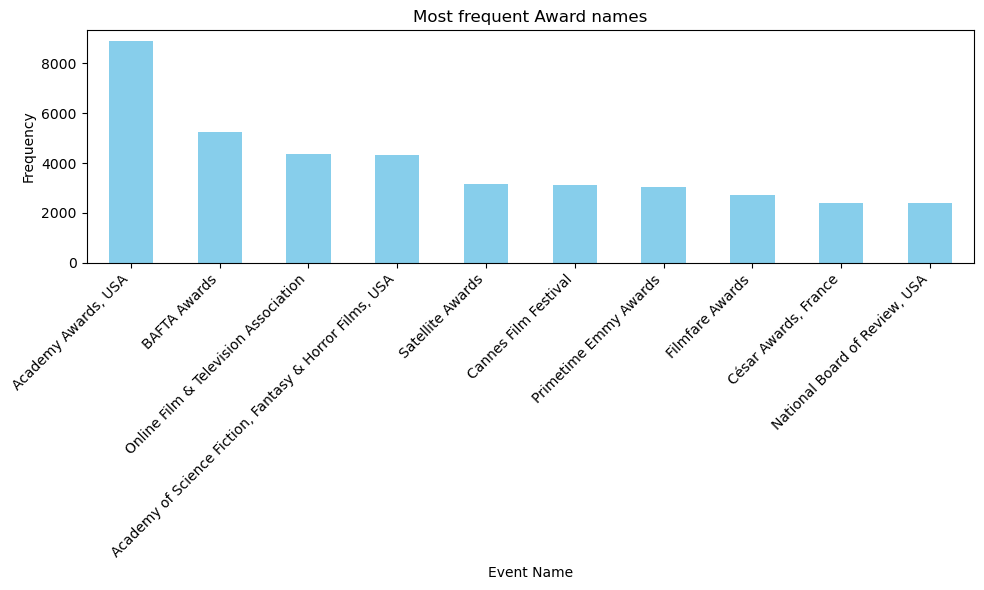

In [72]:
event_counts = cmu_imdb_awards['eventName'].value_counts()
plt.figure(figsize=(10, 6))
event_counts[:10].plot(kind='bar', color='skyblue')
plt.title('Most frequent Award names')
plt.xlabel('Event Name')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

In [133]:
nominations_per_movie = cmu_imdb_awards.groupby(['const', 'eventName', 'year']).agg({
    'categoryName': ['size', lambda x: ', '.join(x.fillna('Not mentioned'))],
    'isWinner': lambda x: x.tolist()
}).reset_index()

# Rename the columns for clarity
nominations_per_movie.columns = ['tconst', 'eventName', 'year', 'numNominations', 'nominationsList', 'isWinnerList']

In [134]:
#For the famous movie Se7ven for instance
nominations_per_movie[nominations_per_movie['tconst'] == 'tt0114369']

,tconst,eventName,year,numNominations,nominationsList,isWinnerList
32776,tt0114369,20/20 Awards,2016,8,"Best Art Direction, Best Cinematography, Best ...","[False, False, True, False, False, False, Fals..."
32777,tt0114369,ASCAP Film and Television Music Awards,1996,1,Top Box Office Films,[True]
32778,tt0114369,"Academy Awards, USA",1996,1,Best Film Editing,[False]
32779,tt0114369,"Academy of Science Fiction, Fantasy & Horror F...",1996,7,"Best Action/Adventure Film, Best Actor, Best D...","[False, False, False, True, False, False, True]"
32780,tt0114369,"American Society of Cinematographers, USA",1996,1,Outstanding Achievement in Cinematography in T...,[False]
32781,tt0114369,Awards Circuit Community Awards,1995,11,"Best Actor in a Leading Role, Best Actor in a ...","[False, False, False, False, True, True, True,..."
32782,tt0114369,Awards of the Japanese Academy,1997,1,Best Foreign Language Film,[False]
32783,tt0114369,BAFTA Awards,1996,1,Best Screenplay - Original,[False]
32784,tt0114369,Blue Ribbon Awards,1997,1,Best Foreign Language Film,[True]
32785,tt0114369,British Society of Cinematographers,1995,1,Not mentioned,[False]


Basically what's on the IMDb page of the movies. Let's take another less known [movie](https://www.imdb.com/title/tt0191173/) to see if what where they've been nominated.

In [130]:
nominations_per_movie[nominations_per_movie['tconst'] =='tt0191173']

,tconst,eventName,year,numNominations,nominationsList,isWinnerList
46955,tt0191173,Daytime Emmy Awards,1994,2,"Outstanding Animated Children's Program, Outst...","[False, True]"
